In [1]:
!pip install tensorflow --user
!pip install keras
!pip install daytime
!pip install torch


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

C:\Users\harsh\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

LABELS = ["Normal","Fraud"]

In [3]:
dataset = pd.read_csv("creditcard.csv")
dataset.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
print(list(dataset.columns))
dataset.describe()

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,-3.065637e-16,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,2.913952e-17,0.001727
std,1.000002e+00,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00,0.041527
min,-1.996583e+00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532294e-01,0.000000
25%,-8.552120e-01,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308401e-01,0.000000
50%,-2.131453e-01,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652715e-01,0.000000
75%,9.372174e-01,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471707e-02,0.000000
max,1.642058e+00,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023622e+02,1.000000


In [14]:
# Check for null values and unique labels
print("Any nulls in the dataset:", dataset.isnull().any().any())
print("Unique labels:", dataset['Class'].unique())
print("\nBreakdown of Normal (0) and Fraud (1) Transactions:")
print(dataset['Class'].value_counts())


Any nulls in the dataset: False
Unique labels: [0 1]

Breakdown of Normal (0) and Fraud (1) Transactions:
Class
0    284315
1       492
Name: count, dtype: int64


<Axes: title={'center': 'Frequency by Observation Number'}, xlabel='Class', ylabel='Number of Observations'>

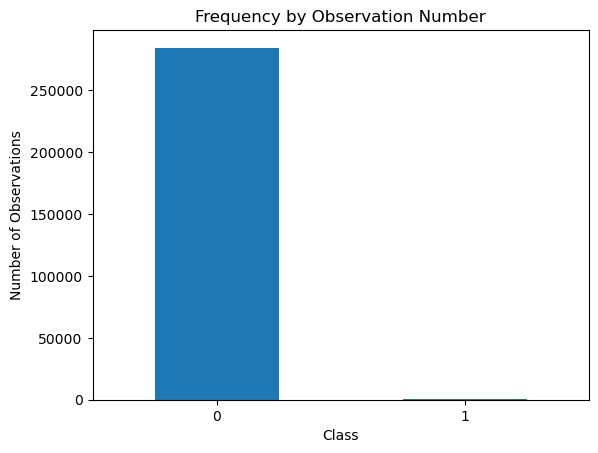

In [15]:
dataset['Class'].value_counts().plot(kind='bar', title="Frequency by Observation Number", xlabel="Class", ylabel="Number of Observations", rot=0)


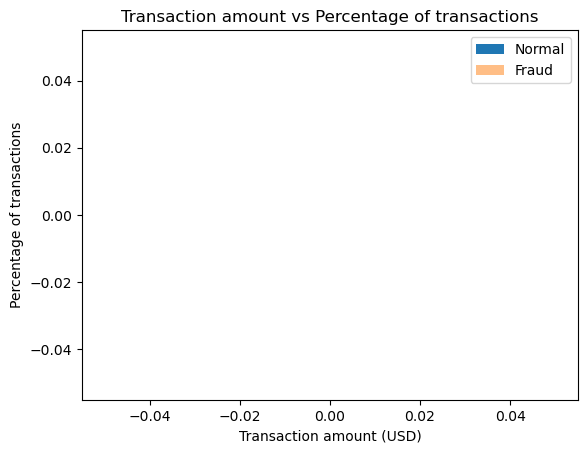

In [16]:
# Separate normal and fraudulent transactions
# skip karo graph ......
normal_dataset = dataset[dataset.Class == 0]
fraud_dataset = dataset[dataset.Class == 1]
#Visualize transactionamounts for normal and fraudulent transactions
bins = np.linspace(200, 2500, 100)
plt.hist(normal_dataset.Amount, bins=bins, alpha=1, density=True, label='Normal')
plt.hist(fraud_dataset.Amount, bins=bins, alpha=0.5, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Transaction amount vs Percentage of transactions")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions");
plt.show()
# skip kar0 this graph

In [17]:
'''Time and Amount are the columns that are not scaled, so applying StandardScaler to only Amount and Time columns.
Normalizing the values between 0 and 1 did not work great for the dataset.'''

'Time and Amount are the columns that are not scaled, so applying StandardScaler to only Amount and Time columns.\nNormalizing the values between 0 and 1 did not work great for the dataset.'

In [18]:
sc=StandardScaler()
dataset['Time'] = sc.fit_transform(dataset['Time'].values.reshape(-1, 1))
dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1, 1))

In [19]:
# First, let's check the distribution of the 'Class' column
print("Original distribution of transactions:")
# print(pd.value_counts(dataset['Class'], sort = True))

# # Select a portion of the normal transactions to convert them to fraud
# # Let's say we want to convert 5% of the normal transactions to fraud
# percentage_to_convert = 5

# # Get the normal transactions (Class == 0)
# normal_transactions = dataset[dataset.Class == 0]

# # Determine how many transactions to convert
# num_to_convert = int(len(normal_transactions) * percentage_to_convert)

# # Randomly sample these normal transactions
# normal_to_fraud = normal_transactions.sample(n=num_to_convert, random_state=2021)

# # Change their class label to 1 (fraud)
# dataset.loc[normal_to_fraud.index, 'Class'] = 1

# #Check the new distribution of transactions
# print("\nUpdated distribution of transactions:")
print(pd.value_counts(dataset['Class'], sort = True))


Original distribution of transactions:
Class
0    284315
1       492
Name: count, dtype: int64


In [20]:
'''The last column in the dataset is our target variable.'''

raw_data = dataset.values
# The last element contains if the transaction is normal which is represented by a 0 and if fraud then 1
labels = raw_data[:, -1]
# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=2021
)

In [21]:
'''Normalize the data to have a value between 0 and 1'''

min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)
train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)
train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [35]:
'''Use only normal transactions to train the Autoencoder.

Normal data has a value of 0 in the target variable. Using the target variable to create a normal and fraud dataset.'''

train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

#creating normal and fraud datasets

normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]
fraud_train_data = train_data[train_labels]
fraud_test_data = test_data[test_labels]
print(" No. of records in Fraud Train Data=",len(fraud_train_data))
print(" No. of records in Normal Train data=",len(normal_train_data))
print(" No. of records in Fraud Test Data=",len(fraud_test_data))
print(" No. of records in Normal Test data=",len(normal_test_data))

 No. of records in Fraud Train Data= 389
 No. of records in Normal Train data= 227456
 No. of records in Fraud Test Data= 103
 No. of records in Normal Test data= 56859


In [36]:
nb_epoch = 50
batch_size = 64
input_dim = normal_train_data.shape[1] #num of columns, 30
encoding_dim = 14
hidden_dim_1 = 7 
hidden_dim_2=4
learning_rate = 1e-7

In [37]:
#input Layer
input_layer = tf.keras.layers.Input(input_dim)

#Encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh",
                        activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)




encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)

encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)

# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)

decoder=  tf.keras.layers.Dropout(0.2)(decoder)

decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)

decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)

#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_12 (Dense)            (None, 14)                434       
                                                                 
 dropout_4 (Dropout)         (None, 14)                0         
                                                                 
 dense_13 (Dense)            (None, 7)                 105       
                                                                 
 dense_14 (Dense)            (None, 4)                 32        
                                                                 
 dense_15 (Dense)            (None, 7)                 35        
                                                                 
 dropout_5 (Dropout)         (None, 7)                 0   

In [38]:
"""Define the callbacks for checkpoints and early stopping"""

cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               mode='min', monitor='val_loss', verbose=2, save_best_only=True)
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True)

In [39]:
#Compile the Autoencoder

autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In [50]:
#Train the Autoencoder

history = autoencoder.fit(normal_train_data,normal_train_data,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_data, test_data),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history


Epoch 1/50
3553/3554 [============================>.] - ETA: 0s - loss: 1.9446e-05 - accuracy: 0.0604
Epoch 1: val_loss did not improve from 0.00002
3554/3554 [==============================] - 9s 2ms/step - loss: 1.9447e-05 - accuracy: 0.0604 - val_loss: 2.0576e-05 - val_accuracy: 0.0109
Epoch 2/50
3529/3554 [============================>.] - ETA: 0s - loss: 1.9531e-05 - accuracy: 0.0602
Epoch 2: val_loss did not improve from 0.00002
3554/3554 [==============================] - 10s 3ms/step - loss: 1.9562e-05 - accuracy: 0.0600 - val_loss: 2.0208e-05 - val_accuracy: 0.2168
Epoch 3/50
3551/3554 [============================>.] - ETA: 0s - loss: 1.9627e-05 - accuracy: 0.0618
Epoch 3: val_loss did not improve from 0.00002
3554/3554 [==============================] - 10s 3ms/step - loss: 1.9631e-05 - accuracy: 0.0618 - val_loss: 2.2402e-05 - val_accuracy: 0.0596
Epoch 4/50
3549/3554 [============================>.] - ETA: 0s - loss: 1.9570e-05 - accuracy: 0.0584
Epoch 4: val_loss did not 

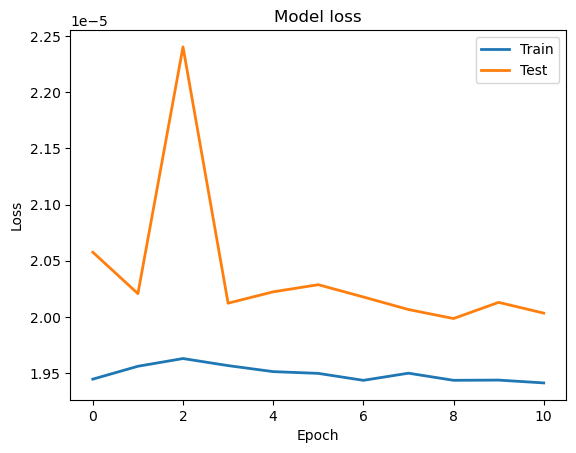

In [51]:
#Plot training and test loss

plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [42]:
"""Detect Anomalies on test data

Anomalies are data points where the reconstruction loss is higher

To calculate the reconstruction loss on test data,
predict the test data and calculate the mean square error between the test data and the reconstructed test data."""

test_x_predictions = autoencoder.predict(test_data)
mse = np.mean(np.power(test_data - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_labels})
print(error_df.head())


1781/1781 [==============================] - 3s 2ms/step
   Reconstruction_error  True_class
0              0.000034       False
1              0.000030       False
2              0.000021       False
3              0.000041       False
4              0.000773       False


7108/7108 [==============================] - 15s 2ms/step
Calculated threshold: 0.00015739822702016683


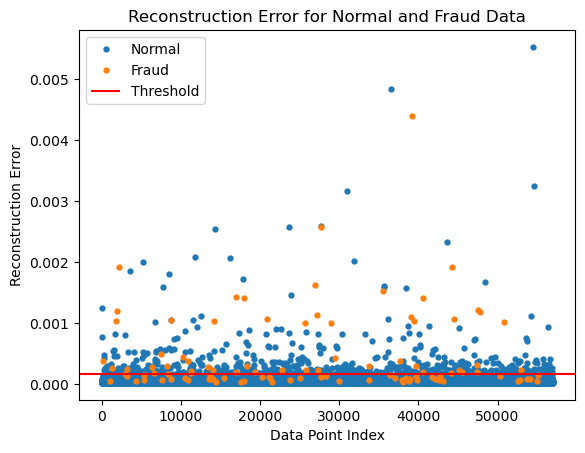

In [43]:
#Plotting the test data points and their respective reconstruction error sets a threshold value to visualize
#if the threshold value needs to be adjusted.
# Predict and calculate reconstruction error for training data
train_loss = np.mean((normal_train_data - autoencoder.predict(normal_train_data))**2, axis=1)

# Set threshold to fixed value or calculate dynamically if needed 
threshold_fixed = np.percentile(train_loss, 99)
print("Calculated threshold:", np.percentile(train_loss, 99))

# Plotting reconstruction error
fig, ax = plt.subplots()
for name, group in error_df.groupby('True_class'):
    ax.plot(group.index, group.Reconstruction_error, 'o', ms=3.5, label="Fraud" if name == 1 else "Normal")

ax.axhline(threshold_fixed, color="r", linestyle="-", label="Threshold")
ax.legend()
ax.set(title="Reconstruction Error for Normal and Fraud Data", xlabel="Data Point Index", ylabel="Reconstruction Error")
plt.show()


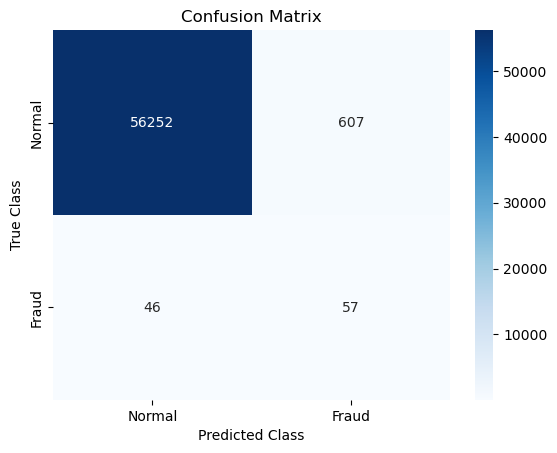

Accuracy: 0.99
Recall: 0.55
Precision: 0.09


In [25]:
'''

Evaluating the performance of the anomaly detection'''
# tough way method 1

# pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
# error_df['pred'] =pred_y
# conf_matrix = confusion_matrix(error_df.True_class, pred_y)
# plt.figure(figsize=(4, 4))
# sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
# plt.title("Confusion matrix")
# plt.ylabel('True class')
# plt.xlabel('Predicted class')
# plt.show()
# # print Accuracy, precision and recall
# print(" Accuracy: ",accuracy_score(error_df['True_class'], error_df['pred']))
# print(" Recall: ",recall_score(error_df['True_class'], error_df['pred']))
# print(" Precision: ",precision_score(error_df['True_class'], error_df['pred']))

# easy way method 2

#Set threshold and predict classes based on reconstruction error

error_df['pred'] = (error_df.Reconstruction_error > threshold_fixed).astype(int)

# Calculate confusion matrix and plot heatmap
conf_matrix = confusion_matrix(error_df.True_class, error_df.pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=LABELS, yticklabels=LABELS)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Print accuracy, recall, and precision
print(f"Accuracy: {accuracy_score(error_df.True_class, error_df.pred):.2f}")
print(f"Recall: {recall_score(error_df.True_class, error_df.pred):.2f}")
print(f"Precision: {precision_score(error_df.True_class, error_df.pred):.2f}")


In [26]:
'''As our dataset is highly imbalanced, we see a high accuracy but a low recall and precision.

Things to further improve precision and recall would add more relevant features,
different architecture for autoencoder, different hyperparameters, or a different algorithm.'''

'As our dataset is highly imbalanced, we see a high accuracy but a low recall and precision.\n\nThings to further improve precision and recall would add more relevant features,\ndifferent architecture for autoencoder, different hyperparameters, or a different algorithm.'

In [27]:
history

{'loss': [2.0880523152300157e-05,
  1.9338294805493206e-05,
  1.953836908796802e-05,
  1.9604429326136597e-05,
  1.9598903236328624e-05,
  1.9599001461756416e-05,
  1.95884258573642e-05,
  1.958125358214602e-05,
  1.9574594261939637e-05,
  1.9577983039198443e-05,
  1.95624179468723e-05],
 'accuracy': [0.06355954706668854,
  0.06781091541051865,
  0.061805360019207,
  0.06052599102258682,
  0.06269344687461853,
  0.06268905103206635,
  0.059330157935619354,
  0.061937253922224045,
  0.06190647929906845,
  0.05939610302448273,
  0.058745428919792175],
 'val_loss': [2.0009920262964442e-05,
  2.0147910618106835e-05,
  2.014177334785927e-05,
  2.022869375650771e-05,
  2.0039433366036974e-05,
  2.033223609032575e-05,
  2.0273046175134368e-05,
  2.0439669242477976e-05,
  2.0147368559264578e-05,
  2.001665961870458e-05,
  2.015986683545634e-05],
 'val_accuracy': [0.042010463774204254,
  0.06607913970947266,
  0.0037217794451862574,
  0.03430357202887535,
  0.055633578449487686,
  0.02689512260